Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [17]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\dsmoljan\miniconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [18]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [19]:
from sklearn.preprocessing import PolynomialFeatures
>>> poly = PolynomialFeatures(1)
fi = poly.fit_transform(X) #matrica dizajna
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [20]:
from numpy import linalg
fi_t = np.transpose(fi)
tmp = inv(dot(fi_t,fi))
tmp2 = dot(tmp,fi_t)
w = dot(tmp2,y)
print("w preko linalg: ", end = " ")
print(w)

w = dot(pinv(fi),y)
print("w preko pinv: ", end = " ")
print(w)



w preko linalg:  [2.2        0.45714286]
w preko pinv:  [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreška učenja: 2.042857142857143


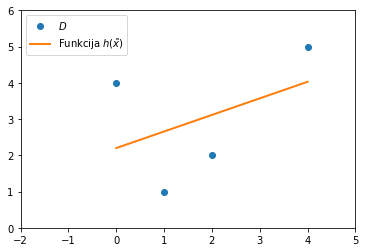

In [21]:
from sklearn.metrics import mean_squared_error
def h_x(x):
    return dot(np.transpose(w),x)

y_pred = np.array([h_x(x) for x in fi])
E = mean_squared_error(y,y_pred)

print("Pogreška učenja: " + str(E))

plt.plot(X, y, 'o', X, y_pred, linewidth = 2)
plt.legend(['$D$', 'Funkcija $h(\~{x}$)'], loc='upper left')
plt.axis([-2, 5, 0, 6]);

# Nisu identične, funkcija srednje kvadratne pogreške množi izraz u sumi sa 1/N, dok naša E množi sa 1/2. Stoga je realnija funkcija srednje kvadratne pogreške, ali kako ova
# promjena pojednostavnjuje stvari, a ne utječe na optimizaciju, ostavljamo je

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [22]:
# Vaš kôd ovdje
try:
    w2 = dot(linalg.inv(fi),y)
    print(w2)
except Exception as err:
    print(err)

# težine w ne možemo naći rješavanjem sustava (egzaktno), jer nam je za to potreban inverz matrice dizajna. A da bi postojao
# inverz matrice, nužno je da matrica bude kvadratna. Kako matrica dizajna očito ne mora biti uvijek kvadratna (primjerice
# broj primjera može biti veći od broja parametara), ovo rješenje nije zadovoljavajuće

Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
print(reg.coef_)
print(reg.intercept_)

y_pred_true = reg.predict(X)
print(y_pred_true)
E = mean_squared_error(y,y_pred_true)
print("Pogreška učenja funkcije predict: " + str(E))

[0.45714286]
2.1999999999999997
[2.2        2.65714286 3.11428571 4.02857143]
Pogreška učenja funkcije predict: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [24]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, X.shape)

In [25]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [26]:
def f(x):
    return (5 + x - 2*(x**2) - 5*(x**3))

x = make_instances(-5,5,50)
y = make_labels(x,f,200)
print(size(y))


50


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

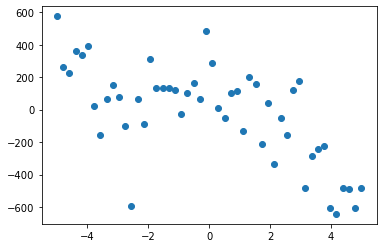

In [27]:
plt.scatter(x,y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

4
E(h|D): 34712.60832200871


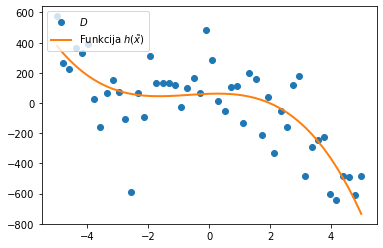

In [28]:
poly3 = PolynomialFeatures(3)
fi_3 = poly3.fit_transform(x)
w_3 = dot(pinv(fi_3),y)

print(size(w_3))

def h3_x(x):
    return dot(np.transpose(w_3),x)

#ovo je ustvari h(x) jel
y_pred_3 = np.array([h3_x(x) for x in fi_3])
E = mean_squared_error(y,y_pred_3)
print("E(h|D): " + str(E))


plt.plot(x, y, 'o', x, y_pred_3, linewidth = 2)
plt.legend(['$D$', 'Funkcija $h(\~{x}$)'], loc='upper left')



### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


E(h|D) za dim = 1: 49166.417111786075
E(h|D) za dim = 3: 34712.60832200871
E(h|D) za dim = 5: 30476.230533472663
E(h|D) za dim = 10: 27216.15458523337
E(h|D) za dim = 20: 18186.63791771066


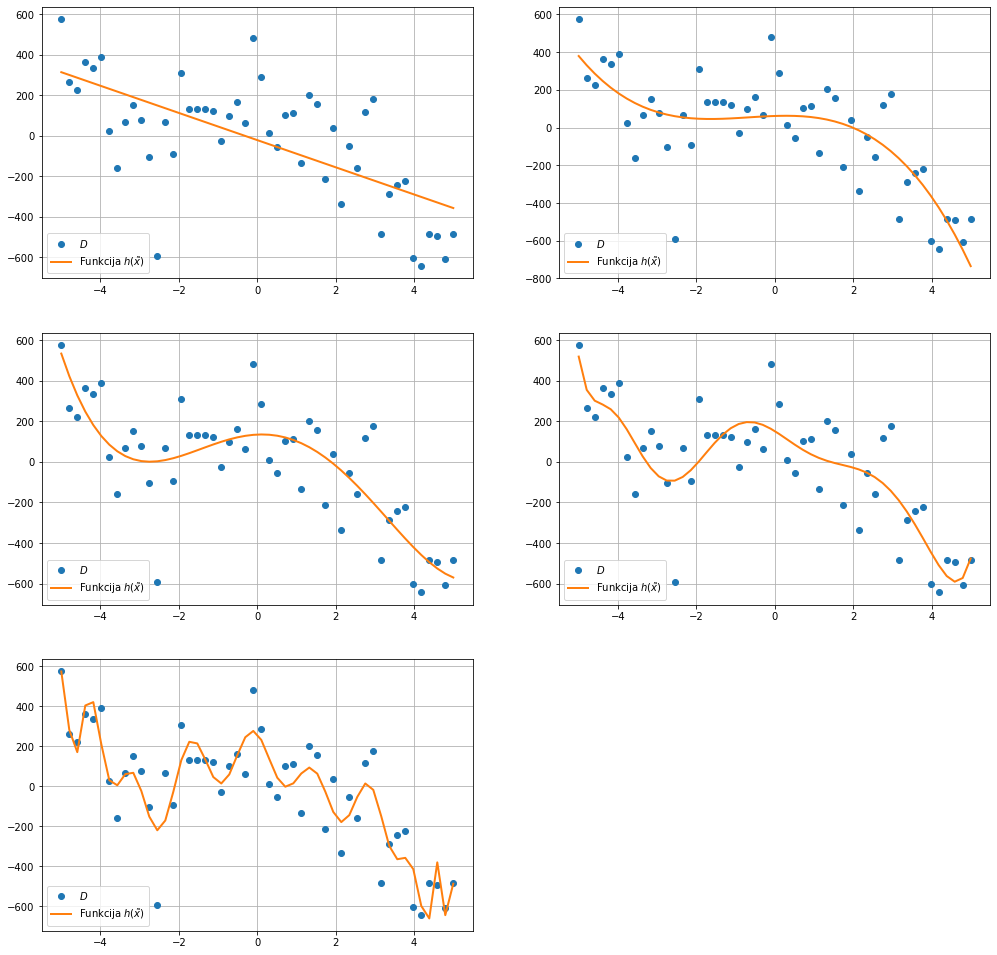

In [29]:
fi_list =  []
w_list = []
y_pred_list = []

dim = [1,3,5,10,20]

for i in range(len(dim)):
    fi_list.append(PolynomialFeatures(dim[i]).fit_transform(x))

for i in range(len(dim)):
    w_list.append(dot(pinv(fi_list[i]),y))

for i in range(len(dim)):
    y_pred_tmp = []
    for fi in fi_list[i]:
        y_pred_tmp.append(dot(np.transpose(w_list[i]), fi))
    y_pred_list.append(y_pred_tmp)
    e_tmp = mean_squared_error(y,y_pred_tmp)
    print("E(h|D) za dim = " + str(dim[i]) + ": " + str(e_tmp))
    
plt.figure(figsize=(17,17))
#samo jos treba nacrtati sve to
for i in range(len(dim)):
    plt.subplot(3,2,i + 1)
    plt.legend(loc="upper left")
    plt.plot(x, y, "o", x, y_pred_list[i], linewidth=2);
    plt.legend(['$D$', 'Funkcija $h(\~{x}$)'], loc='lower left')
    plt.grid()

    


# Najmanju pogrešku učenja ima model dimenzije 20. To je i za očekivati, jer se zbog svoje velike složenosti uspio jako dobro
# prilagoditi podacima za treniranje. Međutim, baš zbog svoje složenosti postoji mogućnost da taj model neće 
# toliko dobro generalizirati.


    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


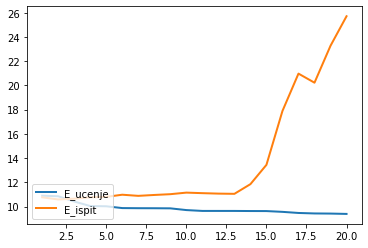

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

E_ucenje = []
E_ispit = []

dim = list(range(1, 21))
print(dim)


for i in range(len(dim)):
    fi_train = PolynomialFeatures(dim[i]).fit_transform(X_train)
    fi_test = PolynomialFeatures(dim[i]).fit_transform(X_test)
    w = dot(pinv(fi_train),y_train)
    y_pred_l = []
    y_pred_t = []

    for fi_train_i in fi_train:
        y_pred_l.append(dot(np.transpose(w), fi_train_i))
    # moze sve i u jednu petlju, ali radi cistog koda odvojeno
    for fi_test_i in fi_test:
        y_pred_t.append(dot(np.transpose(w), fi_test_i))
    
#     e_ucenje = mean_squared_error(y_train, y_pred_l)
#     e_test = mean_squared_error(y_test, y_pred_t)
    E_ucenje.append(mean_squared_error(y_train, y_pred_l))
    E_ispit.append(mean_squared_error(y_test, y_pred_t))
                            
                            
plt.plot(dim, np.log(E_ucenje), dim, np.log(E_ispit), linewidth=2)
plt.legend(['E_ucenje', 'E_ispit'], loc='lower left')


                            
        
    
    
# rezultat je u skladu s očekivanjima. Odabrao bi model koji ima najmanju pogrešku na skupu za testiranje (otprilike dim = 5)
# problem je što se dobivaju nešto drugačiji grafovi. To je zato što train i test skupove svaki put slučajno generiramo
# da imamo više podataka, ovaj problem bi bio manje izražen

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

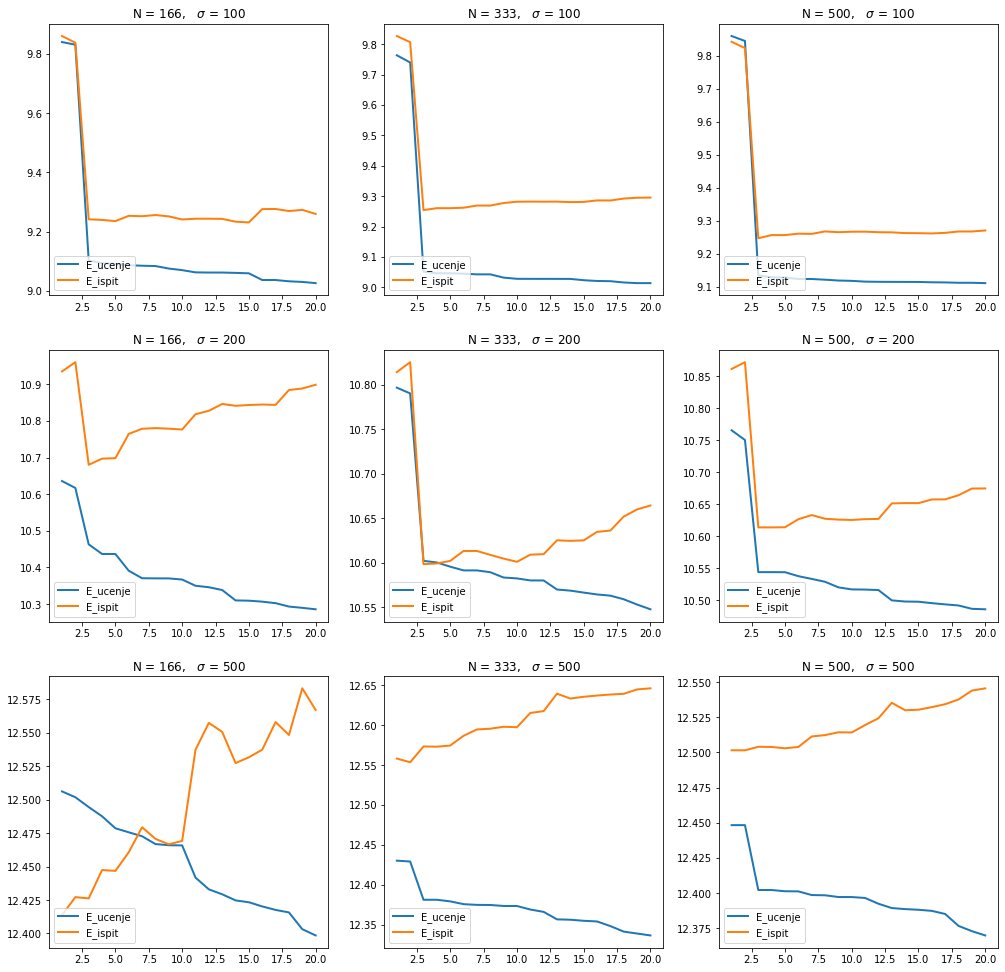

In [31]:
X_main = make_instances(-5,5,1000)
X_train1, X_test1 = train_test_split(X_main, test_size=0.5)

X_train2 = copy(X_train1)
X_test2 = copy(X_test1)
X_train3 = copy(X_train1)
X_test3 = copy(X_test1)

X_list = [X_train1, X_test1, X_train2, X_test2, X_train3, X_test3]
Y_list = []

noise = [100,100,200,200,500,500]

for i in range(len(X_list)):
    Y_list.append(make_labels(X_list[i],f,noise[i]))

datasets_train_x = []
datasets_test_x = []
datasets_train_y = []
datasets_test_y = []

for i in range(0,len(X_list),2):
    #ovime biramo koji elementi iz originalnog polja će se odabrati za elemente podskupa
    for q in range(1, 4):
        index = np.random.choice(500, math.floor((500*q)/3), replace=False)
        x_train_subset = X_list[i][index]
        y_train_subset = Y_list[i][index]
        x_test_subset = X_list[i + 1][index]
        y_test_subset = Y_list[i + 1][index]

        datasets_train_x.append(x_train_subset)
        datasets_train_y.append(y_train_subset)
        datasets_test_x.append(x_test_subset)
        datasets_test_y.append(y_test_subset)
        
dim = list(range(1, 21))

plt.figure(figsize=(17,17))

n = [166,333,500,166,333,500,166,333,500]
noise = [100,100,100,200,200,200,500,500,500]

for i in range(len(datasets_train_x)):
    E_ucenje = []
    E_ispit = []
    for j in range(len(dim)):
        fi_train = PolynomialFeatures(dim[j]).fit_transform(datasets_train_x[i])
        fi_test = PolynomialFeatures(dim[j]).fit_transform(datasets_test_x[i])
        w = dot(pinv(fi_train),datasets_train_y[i])
        y_pred_l = []
        y_pred_t = []

        for fi_train_i in fi_train:
            y_pred_l.append(dot(np.transpose(w), fi_train_i))
        # moze sve i u jednu petlju, ali radi cistog koda odvojeno
        for fi_test_i in fi_test:
            y_pred_t.append(dot(np.transpose(w), fi_test_i))
        
        E_ucenje.append(mean_squared_error(datasets_train_y[i], y_pred_l))
        E_ispit.append(mean_squared_error(datasets_test_y[i], y_pred_t))
    
    plt.subplot(3,3,i + 1)
    plt.plot(dim, np.log(E_ucenje), dim, np.log(E_ispit), linewidth=2)
    plt.title('N = %d,   $\sigma$ = %d' % (len(datasets_train_x[i]), noise[i]) )
    plt.legend(['E_ucenje', 'E_ispit'], loc='lower left')
               
# u svim grafovima primijećujemo trend da s povećanjem dimenzionalnosti greška treniranja pada, a greška testiranja prvo pada pa onda raste - to
# je očekivano. Također možemo primijetiti da što više povećavamo broj primjera za treniranje, to razlika između E_test i E_ispit postaje
# manja. Opet, to je očekivano ponašanje, jer što je modelu na raspolaganju veći broj podataka, to može bolje generalizirati.
# Također općenito primijećujemo da povećanjem šuma u testnim podacima razlika između E_test i E_ispit postaje sve veća - očekivano, zbog
# šuma u podacima model nije uspio toliko dobro naučiti distribuciju primjera.
# Jedini graf za koji nemam logično objašnjenje je N = 500, s = 200


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [32]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

fi = PolynomialFeatures(3).fit_transform(X)

def w(l):
    return dot(dot(inv((dot(np.transpose(fi),fi)) + l*identity(4)),np.transpose(fi)),y)

print(w(0))
print(w(1))
print(w(10))

# Težine se smanjuju kako povećavamo parametar lambda, što je očekivano, jer je cilj (L2) regularizacije što više smanjiti iznos težina u modelu
# matrica koju treba invertirati je dimenzije 4x4


[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [33]:
from sklearn.linear_model import Ridge

l = [0,1,10]

fi = PolynomialFeatures(3, include_bias = False).fit_transform(X)

for lam in l:
    ridge = Ridge(lam)
    ridge.fit(fi,y)
    print("l = " + str(lam) + ", w0 =  "+ str(ridge.intercept_) + " w= " + str(ridge.coef_))




l = 0, w0 =  4.000000000000046 w= [-5.91666667  3.375      -0.45833333]
l = 1, w0 =  3.0569614512471643 w= [-0.69079365 -0.2831746   0.1445805 ]
l = 10, w0 =  2.4944418431229733 w= [-0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

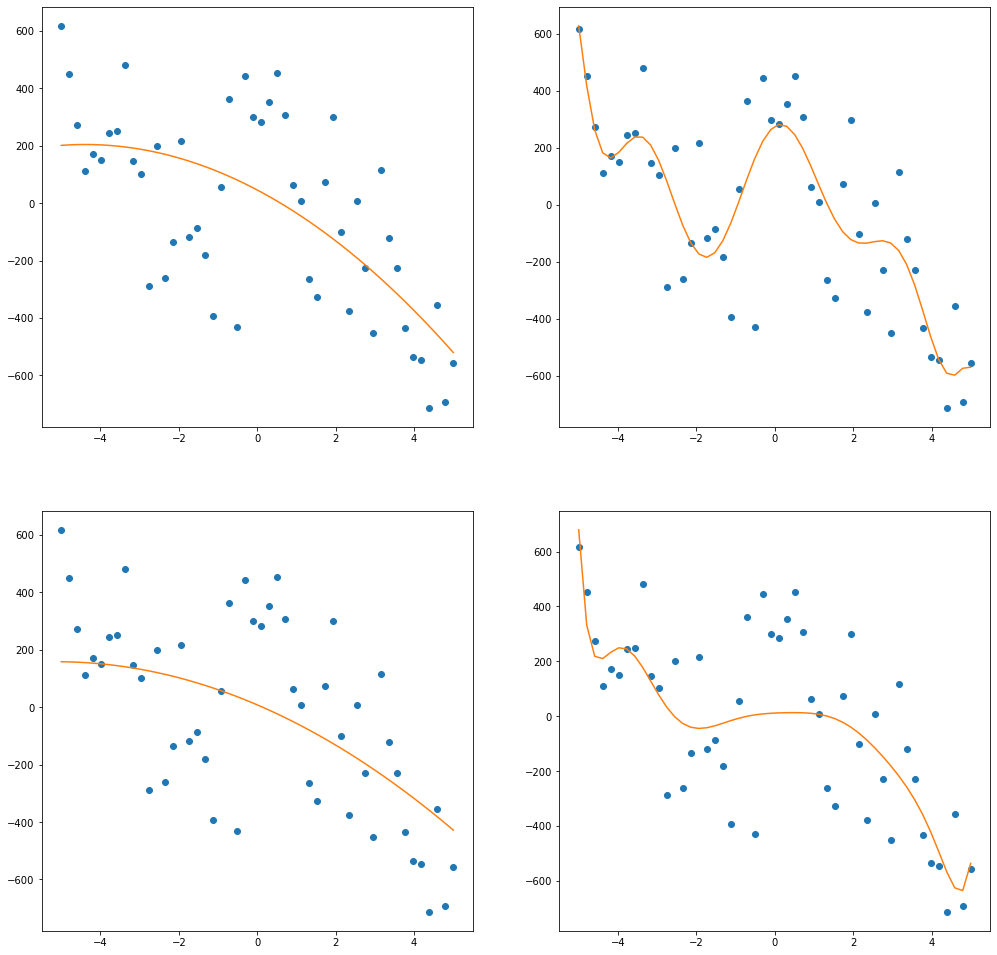

In [34]:
lam = [0,100]
dim = [2,10]

def f(x):
    return (5 + x - 2*(x**2) - 5*(x**3))

x = make_instances(-5,5,50)
y = make_labels(x,f,200)

def w_fun(fi,l,dim):
    return dot(dot(inv((dot(np.transpose(fi),fi)) + l*identity(dim + 1)),np.transpose(fi)),y)

i = 1
plt.figure(figsize=(17,17))
for l in lam:
    for d in dim:
        fi = PolynomialFeatures(d).fit_transform(x)
        w = w_fun(fi,l,d)
        y_pred = []
        
        for elem in fi:
            y_pred.append(dot(np.transpose(w), elem))
        
        plt.subplot(2,2,i)
        plt.plot(x,y,"o",x,y_pred)
        i += 1
    
#mislim da je glavna stvar ovdje to što je regularizacija "smoothala" graf (dakle smanjila je složenost modela smanjujući njegove težine,
# što je cilj (L2) regularizacije)
#dodaj još oznake grafa


        
        


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


(25, 1)
(25, 1)


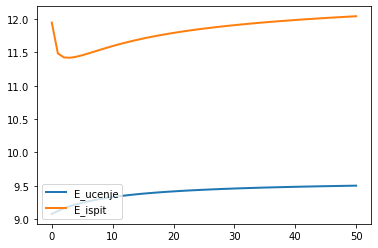

In [47]:
from sklearn.model_selection import train_test_split

x = make_instances(-5,5,50)
y = make_labels(x,f,200)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
d = 10

def w_fun(fi,l,dim):
    return dot(dot(inv((dot(np.transpose(fi),fi)) + l*identity(dim + 1)),np.transpose(fi)),y_train)

print(X_train.shape)
print(X_test.shape)

fi_train = PolynomialFeatures(10).fit_transform(X_train)
fi_test = PolynomialFeatures(10).fit_transform(X_test)


E_ucenje = []
E_ispit = []

lambdas = list(range(51))

for l in lambdas:
    w = w_fun(fi_train,l,10)
    y_pred_train = []
    y_pred_test = []
    
    for elem in fi_train:
        y_pred_train.append(dot(np.transpose(w), elem))
    
    for elem in fi_test:
        y_pred_test.append(dot(np.transpose(w), elem))
    
    E_ucenje.append(mean_squared_error(y_train, y_pred_train))
    E_ispit.append(mean_squared_error(y_test, y_pred_test))

plt.plot(lambdas, np.log(E_ucenje), lambdas, np.log(E_ispit), linewidth=2)
plt.legend(['E_ucenje', 'E_ispit'], loc='lower left')
    

# lijevi dio grafa odgovara prenaučenosti, a desni podnaučenosti (jer što je veći lambda, model je jednostavniji te skloniji podnaučenosti)
# izabrao bi lambda od otprilike 5-7

    
    
    

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [ ]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [ ]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [ ]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [ ]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [ ]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [ ]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.